# RQ 2: How does sentiment correlate with topic, social metrics and demographic variables?

## Resources

In [2]:
# Get Packages & Libraries
library(brms)
library(bayesplot)
library(tidyverse)
library(ggplot2)
library(ggridges)
library(stargazer)
library(patchwork)
library(gghighlight)
library(rethinking)

In [3]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

int2fact <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "integer")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

st <- function(x){
    (x-mean(x,na.rm=TRUE))/sd(x,na.rm=TRUE)
}

numerize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.numeric(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

dbl2fact <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "numeric")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

In [3]:
#unfactorize <- function(df){ # Create a function
#  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
#      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
#  return(df)
#}

In [4]:
# Settings
options(scipen=999)

In [13]:
# Get Data
# View Data
df  <- read.csv("20250403_PhD_LtrChk-RQ2a.csv")
df <- factorize(df)
df <- int2fact(df)
glimpse(df)

Rows: 2,364
Columns: 52
$ docID.AT         <fct> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ docid            <fct> 20910, 21062, 21062, 21324, 21334, 21334, 21354, 2135…
$ docyear          <fct> 1891, 1871, 1871, 1892, 1891, 1891, 1890, 1890, 1800,…
$ docmonth         <fct> 7, 11, 11, 5, 10, 10, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1…
$ authorName       <fct> Isabella Weir Moore, E. Rothwell, E. Rothwell, Isabel…
$ docauthorid      <fct> IED0107, IED0179, IED0179, IED0107, IED0621, IED0621,…
$ authorLocation   <fct> USA, Canada, Canada, USA, USA, USA, USA, USA, USA, US…
$ authorGender     <fct> F, F, F, F, F, F, M, M, F, F, F, F, F, F, F, F, F, F,…
$ nationalOrigin   <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Iris…
$ irish            <fct> True, True, True, True, True, True, True, True, True,…
$ otherUK          <fct> False, False, False, False, False, False, False, Fals…
$ relMin           <fct> NA, NA, NA, NA, False, False, NA, NA, NA, NA, NA, NA,…
$ catholic      

In [14]:
# Correcting gender on William Cunningham
df$Female[df$docauthorid == "IED0211"] <- 0
df$authorGender[df$docauthorid == "IED0211"] <- "M"
#summary(df)

## Partial Pooling Model with Demographic and Temporal Variables

$$CompoundSentiment_{ik} \sim \mathrm{Normal}(\mu_{ik}, \sigma)$$

$$\mu_{ik} = \beta_{0k} + \beta_{1k}Year_i + \beta_{2k}Month_i + \beta_{3k}Place_i $$

$$\beta_{0k} = \gamma_{00} + \gamma_{01}Origin_k + \gamma_{02}Gender_k + \eta_{0k}$$ 
$$\beta_{1k} = \gamma_{10} + \gamma_{11}Origin_k + \eta_{1k}$$
$$\beta_{2k} = \gamma_{20} + \eta_{2k}$$
$$\beta_{3k} = \gamma_{30} + \eta_{3k}$$
$$\gamma_{00},...,\gamma_{30} \sim \mathrm{Normal}(0,.2)$$
$$\sigma \sim \mathrm{Uniform}(0,.3)$$ 

$$\left[ \begin{split}\eta_{0k} \\ \eta_{1k} \\ \eta_{2k} \\ \eta_{3k}\end{split} \right] \sim \mathrm{MVNormal}\left(\left[ \begin{split}0 \\ 0\\ 0 \\ 0 \end{split} \right], \Phi R \Phi\right)$$

$$\Phi = \begin{bmatrix}\phi_0&0&0&0 \\ 0&\phi_1&0&0 \\ 0&0&\phi_2&0 \\ 0&0&0&\phi_3 \end{bmatrix}$$

$$\mathrm{R} = \begin{bmatrix}1&\rho_{01}&\rho_{02}&\rho_{03}\\ {\color{grey}\rho_{\color{grey}{01}}}&1&\rho_{12}&\rho_{13}\\ {\color{grey}\rho_{\color{grey}{02}}}& {\color{grey}\rho_{\color{grey}{12}}}&1&\rho_{23}\\  {\color{grey}\rho_{\color{grey}{03}}}&{\color{grey}\rho_{\color{grey}{13}}}&{\color{grey}\rho_{\color{grey}{23}}}&1\end{bmatrix}$$

$$\phi_0, \phi_1, \phi_2, \phi_3 \sim \mathrm{Uniform}(0,.3) $$
$$R \sim \mathrm{LKJ}(2)$$


20190228_PM_Slides.pdf<br>soci620_19_randomIntercepts.pdf

In [25]:
#get_prior(data=df, family = 'gaussian', formula = scoreCom ~ 1 + Female + Irish * lateCentury + Canada + lowMonths + 
#(1 + lateCentury + Canada + lowMonths | docauthorid))

f5ppSFIxLClMsIS <- readRDS("20250427_PhD_LtrChkScoCom-ppSFIxLClMsIS.rds")

#f5ppSFIxLClMsIS <- brm(data=df,
#            family = 'gaussian',
#            formula = scoreCom ~ 1 + Female + Irish * lateCentury + Canada + lowMonths + 
#(1 + lateCentury + Canada + lowMonths | docauthorid),
#                    prior=c(set_prior("normal(0,.2)",class="Intercept"), # gamma_00
#                    set_prior("uniform(0,.3)",class="sd", ub=.3), # phi_0, phi_1, phi_2, phi_3
#                    set_prior("uniform(0,.3)",class="sigma", ub=.3), #sigma
#                    set_prior("normal(0,.2)",class='b'), # default prior for coefficients
#                    set_prior("lkj(2)", class = "cor")), # R 
#            iter=2500, warmup = 1500, chains=4, cores=4, seed = 4,
#            file = "20250427_PhD_LtrChkScoCom-ppSFIxLClMsIS",
#          control=list(adapt_delta=.99))

#prior_summary(f5ppSFIxLClMsIS)
print(f5ppSFIxLClMsIS)
#posterior_summary(f5ppSFIxLClMsIS, probs = c(.05, .95))[1:6,] #90% CI
#posterior_summary(f5ppSFIxLClMsIS, probs = c(.15, .85))[1:6,] #70% CI

#20190326_PM_Code.html

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ 1 + Female + Irish * lateCentury + Canada + lowMonths + (1 + lateCentury + Canada + lowMonths | docauthorid) 
   Data: df (Number of observations: 2364) 
  Draws: 4 chains, each with iter = 2500; warmup = 1500; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
                             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                    0.09      0.02     0.06     0.13 1.00     1205
sd(lateCentury1)                 0.18      0.04     0.10     0.27 1.00      519
sd(Canada1)                      0.05      0.04     0.00     0.13 1.00      416
sd(lowMonths1)                   0.16      0.02     0.12     0.21 1.00     1443
cor(Intercept,lateCentury1)     -0.01      0.31    -0.57     0.58 1.01      280
cor(Intercept,Canada1)          -0.22      0.36    -0.78     0.55 1.00     1214
cor(lateCentury1,Canada1)      

In draft notebook, I confirmed that changing from the FemaleF to Female factor variables makes no difference. Proceeding with the variables without the F suffix.

## Adding latent narrative variables

$$CompoundSentiment_{ik} \sim \mathrm{Normal}(\mu_{ik}, \sigma)$$

$$\mu_{ik} = \beta_{0k} + \beta_{1k}Year_i + \beta_{2k}Month_i + \beta_{3k}Place_i + \beta_{4k}Social_i + \beta_{5k}Self_i +$$ 
$$\beta_{6k}Weather + \beta_{7k}Money_i + \beta_{8k}Farming_i + \beta_{9k}People_i + \beta_{10k}Setting_i +$$
$$\beta_{11k}Contemplation_i + \beta_{12k}Family_i + \beta_{13k}Travel_i + \beta_{14k}Difficulty_i + \beta_{15k}Government_i$$

$$\beta_{0k} = \gamma_{00} + \gamma_{01}Origin_k + \gamma_{02}Gender_k + \eta_{0k}$$ 
$$\beta_{1k} = \gamma_{10} + \gamma_{11}Origin_k + \eta_{1k}$$
$$\beta_{2k} = \gamma_{20} + \eta_{2k}$$
$$\beta_{3k} = \gamma_{30} + \eta_{3k}$$
$$\beta_{4k} = \gamma_{40} + \eta_{4k}$$
$$\beta_{5k} = \gamma_{50} + \eta_{5k}$$
$$\beta_{6k} = \gamma_{60} + \eta_{6k}$$
$$\beta_{7k} = \gamma_{70} + \eta_{7k}$$
$$\beta_{8k} = \gamma_{80} + \eta_{8k}$$
$$\beta_{9k} = \gamma_{90} + \eta_{9k}$$
$$\beta_{10k} = \gamma_{100} + \eta_{10k}$$
$$\beta_{11k} = \gamma_{110} + \eta_{11k}$$
$$\beta_{12k} = \gamma_{120} + \eta_{12k}$$
$$\beta_{13k} = \gamma_{130} + \eta_{13k}$$
$$\beta_{14k} = \gamma_{140} + \eta_{14k}$$
$$\beta_{15k} = \gamma_{150} + \eta_{15k}$$
$$\gamma_{00},...,\gamma_{150} \sim \mathrm{Normal}(0,.2)$$
$$\sigma \sim \mathrm{Uniform}(0,.3)$$ 

$$\left[ \begin{split}\eta_{0k} \\ \eta_{1k} \\ \eta_{2k} \\ \eta_{3k}\\ \eta_{4k}\\ \eta_{5k} \\ \eta_{6k} \\ \eta_{7k} \\ \eta_{8k} \\ \eta_{9k}\\ \eta_{10k}\\ \eta_{11k} \\ \eta_{12k} \\ \eta_{13k} \\ \eta_{14k} \\ \eta_{15k}\end{split} \right] \sim \mathrm{MVNormal}\left(\left[ \begin{split}0 \\ 0\\ 0 \\ 0 \\ 0\\ 0 \\ 0 \\ 0\\ 0 \\ 0 \\ 0\\ 0 \\ 0 \\ 0\\ 0\\0\end{split} \right], \Phi R \Phi\right)$$

$$\Phi = \begin{bmatrix}\phi_0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\ 0&\phi_1&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\ 0&0&\phi_2&0&0&0&0&0&0&0&0&0&0&0&0&0 \\ 0&0&0&\phi_3&0&0&0&0&0&0&0&0&0&0&0&0 \\ 0&0&0&0&\phi_4&0&0&0&0&0&0&0&0&0&0&0 \\ 0&0&0&0&0&\phi_5&0&0&0&0&0&0&0&0&0&0 \\ 0&0&0&0&0&0&\phi_6&0&0&0&0&0&0&0&0&0 \\ 0&0&0&0&0&0&0&\phi_7&0&0&0&0&0&0&0&0 \\ 0&0&0&0&0&0&0&0&\phi_8&0&0&0&0&0&0&0 \\ 0&0&0&0&0&0&0&0&0&\phi_9&0&0&0&0&0&0 \\ 0&0&0&0&0&0&0&0&0&0&\phi_{10}&0&0&0&0&0 \\ 0&0&0&0&0&0&0&0&0&0&0&\phi_{11}&0&0&0&0 \\ 0&0&0&0&0&0&0&0&0&0&0&0&\phi_{12}&0&0&0 \\ 0&0&0&0&0&0&0&0&0&0&0&0&0&\phi_{13}&0&0 \\ 0&0&0&0&0&0&0&0&0&0&0&0&0&0&\phi_{14}&0 \\ 0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&\phi_{15} \end{bmatrix}$$


$$\mathrm{R} = \begin{bmatrix}1&\rho_{01}&\rho_{02}&\rho_{03}&\rho_{04}&\rho_{05}&\rho_{06}&\rho_{07}&\rho_{08}&\rho_{09}&\rho_{010}&\rho_{011}&\rho_{012}&\rho_{013}&\rho_{014}&\rho_{015} \\ {\color{grey}\rho_{\color{grey}{01}}}&1&\rho_{12}&\rho_{13}&\rho_{14}&\rho_{15}&\rho_{16}&\rho_{17}&\rho_{18}&\rho_{19}&\rho_{110}&\rho_{111}&\rho_{112}&\rho_{113}&\rho_{114}&\rho_{115} \\ {\color{grey}\rho_{\color{grey}{02}}}& {\color{grey}\rho_{\color{grey}{12}}}&1&\rho_{23}&\rho_{24}&\rho_{25}&\rho_{26}&\rho_{27}&\rho_{28}&\rho_{29}&\rho_{210}&\rho_{211}&\rho_{212}&\rho_{213}&\rho_{214}&\rho_{215} \\  {\color{grey}\rho_{\color{grey}{03}}}&{\color{grey}\rho_{\color{grey}{13}}}&{\color{grey}\rho_{\color{grey}{23}}}&1&\rho_{34}&\rho_{35}&\rho_{36}&\rho_{37}&\rho_{38}&\rho_{39} &\rho_{310}&\rho_{311}&\rho_{312}&\rho_{313}&\rho_{314}&\rho_{315} \\  {\color{grey}\rho_{\color{grey}{04}}}&{\color{grey}\rho_{\color{grey}{14}}}&{\color{grey}\rho_{\color{grey}{24}}}&{\color{grey}\rho_{\color{grey}{34}}}&1&\rho_{45}&\rho_{46}&\rho_{47}&\rho_{48}&\rho_{49} &\rho_{410}&\rho_{411}&\rho_{412}&\rho_{413}&\rho_{414}&\rho_{415} \\  {\color{grey}\rho_{\color{grey}{05}}}&{\color{grey}\rho_{\color{grey}{15}}}&{\color{grey}\rho_{\color{grey}{25}}}&{\color{grey}\rho_{\color{grey}{35}}}&{\color{grey}\rho_{\color{grey}{45}}}&1&\rho_{56}&\rho_{57}&\rho_{58}&\rho_{59} &\rho_{510}&\rho_{511}&\rho_{512}&\rho_{513}&\rho_{514}&\rho_{515} \\  {\color{grey}\rho_{\color{grey}{06}}}&{\color{grey}\rho_{\color{grey}{16}}}&{\color{grey}\rho_{\color{grey}{26}}}&{\color{grey}\rho_{\color{grey}{36}}}&{\color{grey}\rho_{\color{grey}{46}}}&{\color{grey}\rho_{\color{grey}{56}}}&1&\rho_{67}&\rho_{68}&\rho_{69} &\rho_{610}&\rho_{611}&\rho_{612}&\rho_{613}&\rho_{614}&\rho_{615} \\  {\color{grey}\rho_{\color{grey}{07}}}&{\color{grey}\rho_{\color{grey}{17}}}&{\color{grey}\rho_{\color{grey}{27}}}&{\color{grey}\rho_{\color{grey}{37}}}&{\color{grey}\rho_{\color{grey}{47}}}&{\color{grey}\rho_{\color{grey}{57}}}&{\color{grey}\rho_{\color{grey}{67}}}&1&\rho_{78}&\rho_{79} &\rho_{710}&\rho_{711}&\rho_{712}&\rho_{713}&\rho_{714}&\rho_{715} \\  {\color{grey}\rho_{\color{grey}{08}}}&{\color{grey}\rho_{\color{grey}{18}}}&{\color{grey}\rho_{\color{grey}{28}}}&{\color{grey}\rho_{\color{grey}{38}}}&{\color{grey}\rho_{\color{grey}{48}}}&{\color{grey}\rho_{\color{grey}{58}}}&{\color{grey}\rho_{\color{grey}{68}}}&{\color{grey}\rho_{\color{grey}{78}}}&1&\rho_{89} &\rho_{810}&\rho_{811}&\rho_{812}&\rho_{813}&\rho_{814}&\rho_{815} \\  {\color{grey}\rho_{\color{grey}{09}}}&{\color{grey}\rho_{\color{grey}{19}}}&{\color{grey}\rho_{\color{grey}{29}}}&{\color{grey}\rho_{\color{grey}{39}}}&{\color{grey}\rho_{\color{grey}{49}}}&{\color{grey}\rho_{\color{grey}{59}}}&{\color{grey}\rho_{\color{grey}{69}}}&{\color{grey}\rho_{\color{grey}{79}}}&{\color{grey}\rho_{\color{grey}{89}}}&1&\rho_{910}&\rho_{911}&\rho_{912}&\rho_{913}&\rho_{914}&\rho_{915}\\  {\color{grey}\rho_{\color{grey}{010}}}&{\color{grey}\rho_{\color{grey}{110}}}&{\color{grey}\rho_{\color{grey}{210}}}&{\color{grey}\rho_{\color{grey}{310}}}&{\color{grey}\rho_{\color{grey}{410}}}&{\color{grey}\rho_{\color{grey}{510}}}&{\color{grey}\rho_{\color{grey}{610}}}&{\color{grey}\rho_{\color{grey}{710}}}&{\color{grey}\rho_{\color{grey}{810}}}&{\color{grey}\rho_{\color{grey}{910}}}&1&\rho_{1011}&\rho_{1012}&\rho_{1013}&\rho_{1014}&\rho_{1015}\\  {\color{grey}\rho_{\color{grey}{011}}}&{\color{grey}\rho_{\color{grey}{111}}}&{\color{grey}\rho_{\color{grey}{211}}}&{\color{grey}\rho_{\color{grey}{311}}}&{\color{grey}\rho_{\color{grey}{411}}}&{\color{grey}\rho_{\color{grey}{511}}}&{\color{grey}\rho_{\color{grey}{611}}}&{\color{grey}\rho_{\color{grey}{711}}}&{\color{grey}\rho_{\color{grey}{811}}}&{\color{grey}\rho_{\color{grey}{911}}}&{\color{grey}\rho_{\color{grey}{1011}}}&1&\rho_{1112}&\rho_{1113}&\rho_{1114}&\rho_{1115}\\  {\color{grey}\rho_{\color{grey}{012}}}&{\color{grey}\rho_{\color{grey}{112}}}&{\color{grey}\rho_{\color{grey}{212}}}&{\color{grey}\rho_{\color{grey}{312}}}&{\color{grey}\rho_{\color{grey}{412}}}&{\color{grey}\rho_{\color{grey}{512}}}&{\color{grey}\rho_{\color{grey}{612}}}&{\color{grey}\rho_{\color{grey}{712}}}&{\color{grey}\rho_{\color{grey}{812}}}&{\color{grey}\rho_{\color{grey}{912}}}&{\color{grey}\rho_{\color{grey}{1012}}}&{\color{grey}\rho_{\color{grey}{1112}}}&1&\rho_{1213}&\rho_{1214}&\rho_{1215}\\  {\color{grey}\rho_{\color{grey}{013}}}&{\color{grey}\rho_{\color{grey}{113}}}&{\color{grey}\rho_{\color{grey}{213}}}&{\color{grey}\rho_{\color{grey}{313}}}&{\color{grey}\rho_{\color{grey}{413}}}&{\color{grey}\rho_{\color{grey}{513}}}&{\color{grey}\rho_{\color{grey}{613}}}&{\color{grey}\rho_{\color{grey}{713}}}&{\color{grey}\rho_{\color{grey}{813}}}&{\color{grey}\rho_{\color{grey}{913}}}&{\color{grey}\rho_{\color{grey}{1013}}}&{\color{grey}\rho_{\color{grey}{1113}}}&{\color{grey}\rho_{\color{grey}{1213}}}&1&\rho_{1314}&\rho_{1315}\\  {\color{grey}\rho_{\color{grey}{014}}}&{\color{grey}\rho_{\color{grey}{114}}}&{\color{grey}\rho_{\color{grey}{214}}}&{\color{grey}\rho_{\color{grey}{314}}}&{\color{grey}\rho_{\color{grey}{414}}}&{\color{grey}\rho_{\color{grey}{514}}}&{\color{grey}\rho_{\color{grey}{614}}}&{\color{grey}\rho_{\color{grey}{714}}}&{\color{grey}\rho_{\color{grey}{814}}}&{\color{grey}\rho_{\color{grey}{914}}}&{\color{grey}\rho_{\color{grey}{1014}}}&{\color{grey}\rho_{\color{grey}{1114}}}&{\color{grey}\rho_{\color{grey}{1214}}}&{\color{grey}\rho_{\color{grey}{1314}}}&1&\rho_{1415}\\  {\color{grey}\rho_{\color{grey}{015}}}&{\color{grey}\rho_{\color{grey}{115}}}&{\color{grey}\rho_{\color{grey}{215}}}&{\color{grey}\rho_{\color{grey}{315}}}&{\color{grey}\rho_{\color{grey}{415}}}&{\color{grey}\rho_{\color{grey}{515}}}&{\color{grey}\rho_{\color{grey}{615}}}&{\color{grey}\rho_{\color{grey}{715}}}&{\color{grey}\rho_{\color{grey}{815}}}&{\color{grey}\rho_{\color{grey}{915}}}&{\color{grey}\rho_{\color{grey}{1015}}}&{\color{grey}\rho_{\color{grey}{1115}}}&{\color{grey}\rho_{\color{grey}{1215}}}&{\color{grey}\rho_{\color{grey}{1315}}}&{\color{grey}\rho_{\color{grey}{1415}}}&1\end{bmatrix}$$

$$\phi_0,..., \phi_{15} \sim \mathrm{Uniform}(0,.3) $$
$$R \sim \mathrm{LKJ}(2)$$


20190228_PM_Slides.pdf<br>soci620_19_randomIntercepts.pdf

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.1981 -0.7820 -0.1956  0.0000  0.6130  6.7361 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.007491 0.018051 0.021572 0.032609 0.142857 

[1] 0.01800536

[1] 0.1428575

[1] 6.736073

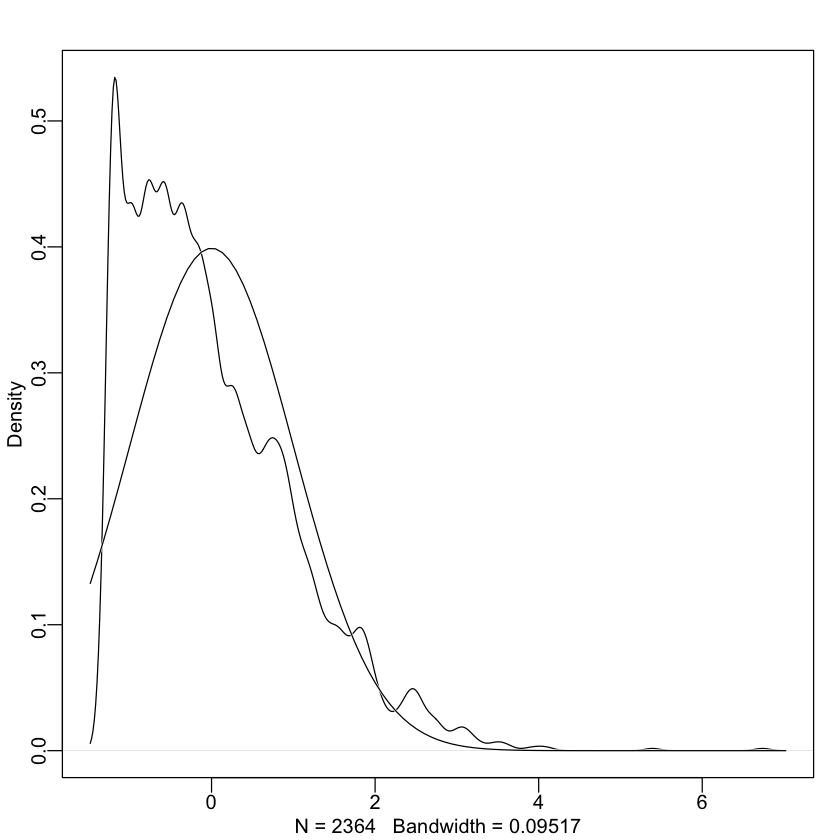

In [15]:
# Transforming variable
df$mentsRate.s <- st(df$mentsRate)
summary(df$mentsRate.s)
dens(df$mentsRate.s, norm.comp = TRUE)

summary(df$mentsRate)
sd(df$mentsRate)

# Converting between scales
sd(df$mentsRate)*6.7361 +mean(df$mentsRate) # Standardized to original
(0.142857-mean(df$mentsRate))/sd(df$mentsRate) # Original to standardized

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.61244 -0.77166 -0.08857  0.00000  0.67260  4.14025 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01923 0.03485 0.03688 0.05226 0.13158 

[1] 0.0228726

[1] 0.1315789

[1] 4.140297

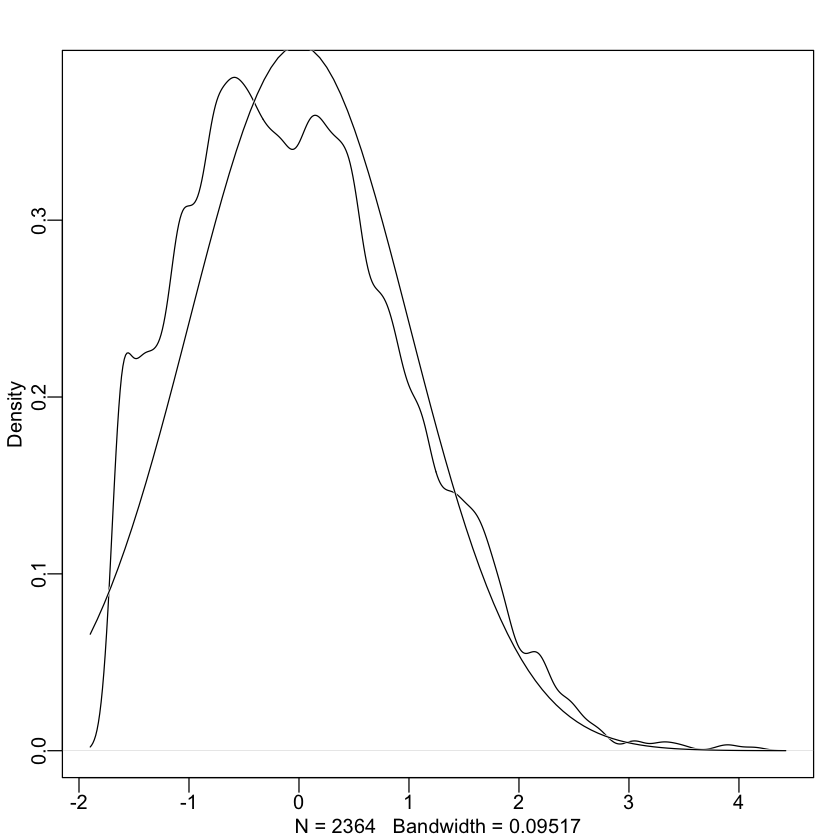

In [16]:
# Transforming variable - All first person pronouns
df$fppAllRate.s <- st(df$fppAllRate)
summary(df$fppAllRate.s)
dens(df$fppAllRate.s, norm.comp = TRUE)

# Original Variable
summary(df$fppAllRate)
sd(df$fppAllRate)

# Converting between scales
sd(df$fppAllRate)*4.14025+mean(df$fppAllRate) # Standardized to original
(0.13158-mean(df$fppAllRate))/sd(df$fppAllRate) # Original to standardized

In [49]:
#table(df$topicLabel, df$docauthorid)
topicCounts <- df %>% 
  group_by(docauthorid, topicLabel, .drop = FALSE) %>% 
  summarise(n = n(), .groups = 'drop')%>%
pivot_wider(names_from = topicLabel, values_from = n)%>%
t()%>%
data.frame()%>%
slice(-1)%>%
numerize()%>%
mutate(count=rowSums(.!=0))

topicCounts%>%
select(175)

,count
,<dbl>
01 Weather,44
02 Money,50
03 Farming,69
04 Correspondence,55
05 People,67
06 Setting,26
07 Contemplation,11
08 Family Life,34
09 Travel,40


In [17]:
vars <- c('Weather','Money','Farming','Correspondence','People','Setting','Contemplation','Family', 'Travel', 'Difficulty', 'Government')
df[vars] <- 0

# Populating with new data
df['Weather'][df['topicNumber']==0] <- 1
df['Money'][df['topicNumber']==1] <- 1
df['Farming'][df['topicNumber']==2] <- 1
df['Correspondence'][df['topicNumber']==3] <- 1
df['People'][df['topicNumber']==4] <- 1
df['Setting'][df['topicNumber']==5] <- 1
df['Contemplation'][df['topicNumber']==6] <- 1
df['Family'][df['topicNumber']==7] <- 1
df['Travel'][df['topicNumber']==8] <- 1
df['Difficulty'][df['topicNumber']==9] <- 1
df['Government'][df['topicNumber']==10] <- 1

df %>% 
select(all_of(vars), topicLabel) %>% 
unique() %>% 
arrange(topicLabel)

counts <- df %>% 
select(docauthorid,all_of(vars)) %>%
group_by(docauthorid) %>%
summarise(across(everything(), sum)) %>%
mutate(Totals = rowSums(.[2:12])) %>%
bind_rows(summarise(., across(where(is.numeric), sum),
                        across(where(is.factor), ~'Segments')))

counts <- rbind(counts, data.frame(docauthorid='Authors', t(colSums(counts[1:174,2:13]> 0)))) %>% 
mutate(TopicCount = rowSums(.[2:12]!=0)) %>% 
data.frame() %>%
column_to_rownames(var = "docauthorid")

counts[175:176,1:12]


Weather,Money,Farming,Correspondence,People,Setting,Contemplation,Family,Travel,Difficulty,Government,topicLabel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,0,0,0,0,0,0,0,0,0,01 Weather
0,1,0,0,0,0,0,0,0,0,0,02 Money
0,0,1,0,0,0,0,0,0,0,0,03 Farming
0,0,0,1,0,0,0,0,0,0,0,04 Correspondence
0,0,0,0,1,0,0,0,0,0,0,05 People
0,0,0,0,0,1,0,0,0,0,0,06 Setting
0,0,0,0,0,0,1,0,0,0,0,07 Contemplation
0,0,0,0,0,0,0,1,0,0,0,08 Family Life
0,0,0,0,0,0,0,0,1,0,0,09 Travel


,Weather,Money,Farming,Correspondence,People,Setting,Contemplation,Family,Travel,Difficulty,Government,Totals
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Segments,173,159,222,298,264,182,165,291,139,257,214,2364
Authors,44,50,69,55,67,26,11,34,40,26,50,174


In [47]:
df[vars]<- dbl2fact(df[vars])
glimpse(df)

Rows: 2,364
Columns: 65
$ docID.AT         <fct> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ docid            <fct> 20910, 21062, 21062, 21324, 21334, 21334, 21354, 2135…
$ docyear          <fct> 1891, 1871, 1871, 1892, 1891, 1891, 1890, 1890, 1800,…
$ docmonth         <fct> 7, 11, 11, 5, 10, 10, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1…
$ authorName       <fct> Isabella Weir Moore, E. Rothwell, E. Rothwell, Isabel…
$ docauthorid      <fct> IED0107, IED0179, IED0179, IED0107, IED0621, IED0621,…
$ authorLocation   <fct> USA, Canada, Canada, USA, USA, USA, USA, USA, USA, US…
$ authorGender     <fct> F, F, F, F, F, F, M, M, F, F, F, F, F, F, F, F, F, F,…
$ nationalOrigin   <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Iris…
$ irish            <fct> True, True, True, True, True, True, True, True, True,…
$ otherUK          <fct> False, False, False, False, False, False, False, Fals…
$ relMin           <fct> NA, NA, NA, NA, False, False, NA, NA, NA, NA, NA, NA,…
$ catholic      

In [48]:
write.csv(df, "20250427_PhD_LtrChk-RQ2b.csv", row.names=FALSE)

It seems that the global intercept (1) with mean centered predictors is the default but I make it explicit in my models. To omit this global intercept, I would use the 0 + or -1 + notation. This is useful for indexed predictor variables. To use the original rather than mean-centered predictors, I would use the 0 + Intercept + x notation, as described at https://paulbuerkner.com/brms/reference/brmsformula.html and https://bookdown.org/content/4857/horoscopes-insights.html#consider-using-the-0-intercept-syntax (e.g., b16.9)

In [22]:
#get_prior(data=df, family = 'gaussian', 
#          formula = scoreCom ~ 1 + Female + 
#                           Irish * lateCentury + 
#                           Canada + 
#                           lowMonths + 
#                           mentsRate.s + 
#                           fppAllRate.s + 
#                           Weather +                
#                           Money + 
#                           Farming + 
#                           People + 
#                           Setting +
#                           Contemplation + 
#                           Family + 
#                           Travel + 
#                           Difficulty + 
#                           Government +
#                           (1 + lateCentury + 
#                            Canada + 
#                            lowMonths + 
#                            mentsRate.s + 
#                            fppAllRate.s + 
#                            Weather +
#                            Money + 
#                            Farming + 
#                            People + 
#                            Setting +
#                            Contemplation + 
#                            Family + 
#                            Travel + 
#                            Difficulty + 
#                            Government | docauthorid))

In draft notebook, I ran the model with indicator variables as numeric rather than factor data -- this change made no difference so proceeding with factor version to facilitate visualization.

In [55]:
# THIS WAS MODEL WAS RUN WITH INDICATOR VARIABLES AS FACTOR DATA

f5ppSFIxLClMsSocSelTopIS <- readRDS("20250427_PhD_LtrChkScoCom-ppSFIxLClMsSocSelTopIS.rds")

#f5ppSFIxLClMsSocSelTopIS <- brm(data=df,
#            family = 'gaussian',
#            formula = scoreCom ~ 1 + Female + 
#                           Irish * lateCentury + 
#                           Canada + 
#                           lowMonths + 
#                           mentsRate.s + 
#                           fppAllRate.s + 
#                           Weather +                
#                           Money + 
#                           Farming + 
#                           People + 
#                           Setting +
#                           Contemplation + 
#                           Family + 
#                           Travel + 
#                           Difficulty + 
#                           Government +
#                           (1 + lateCentury + 
#                            Canada + 
#                            lowMonths + 
#                            mentsRate.s + 
#                            fppAllRate.s + 
#                            Weather +
#                            Money + 
#                            Farming + 
#                            People + 
#                            Setting +
#                            Contemplation + 
#                            Family + 
#                            Travel + 
#                            Difficulty + 
#                            Government | docauthorid),
#                    prior=c(set_prior("normal(0,.2)",class="Intercept"), # gamma_00
#                    set_prior("uniform(0,.3)",class="sd", ub=.3), # phi
#                    set_prior("uniform(0,.3)",class="sigma", ub=.3), #sigma
#                    set_prior("normal(0,.2)",class='b'), # other gammas
#                    set_prior("lkj(2)", class = "cor")), # R 
#            iter=2500, warmup = 1500, chains=4, cores=4, seed = 4,
#            file = "20250427_PhD_LtrChkScoCom-ppSFIxLClMsSocSelTopIS",
#          control=list(adapt_delta=.99))

#prior_summary(f5ppSFIxLClMsSoSeIS)
print(f5ppSFIxLClMsSocSelTopIS)
#posterior_summary(f5ppSFIxLClMsSocSelTopIS, pars = "^b_", probs = c(.05, .95))#[1:6,] #90% CI
#posterior_summary(f5ppSFIxLClMsSocSelTopIS, pars = "^b_", probs = c(.15, .85))#[1:6,] #70% CI

#20190326_PM_Code.html

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ 1 + Female + Irish * lateCentury + Canada + lowMonths + mentsRate.s + fppAllRate.s + Weather + Money + Farming + People + Setting + Contemplation + Family + Travel + Difficulty + Government + (1 + lateCentury + Canada + lowMonths + mentsRate.s + fppAllRate.s + Weather + Money + Farming + People + Setting + Contemplation + Family + Travel + Difficulty + Government | docauthorid) 
   Data: df (Number of observations: 2364) 
  Draws: 4 chains, each with iter = 2500; warmup = 1500; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
                                 Estimate Est.Error l-95% CI u-95% CI Rhat
sd(Intercept)                        0.05      0.03     0.00     0.11 1.01
sd(lateCentury1)                     0.19      0.04     0.12     0.27 1.00
sd(Canada1)                          0.07      0.04     0.00     0.14 1.01
sd(lowMonths1)     

Base (reference) case in the model above is English, Scottish or Welsh men writing about correspondence from the United States before 1869 during a medium, high or holiday month who make average mention of themselves and others. 

In [50]:
f5ppSFIxLClMsIS_i <- add_criterion(f5ppSFIxLClMsIS, "waic")
f5ppSFIxLClMsSocSelTopIS_i <- add_criterion(f5ppSFIxLClMsSocSelTopIS, "waic")

w <- loo_compare(f5ppSFIxLClMsIS_i, f5ppSFIxLClMsSocSelTopIS_i, criterion = "waic")

print(w, simplify = F)

Warning message:
“
93 (3.9%) p_waic estimates greater than 0.4. We recommend trying loo instead.”
Automatically saving the model object in '20250427_PhD_LtrChkScoCom-ppSFIxLClMsIS.rds'

Warning message:
“
189 (8.0%) p_waic estimates greater than 0.4. We recommend trying loo instead.”
Automatically saving the model object in '20250427_PhD_LtrChkScoCom-ppSFIxLClMsSocSelTopIS.rds'



                           elpd_diff se_diff elpd_waic se_elpd_waic p_waic
f5ppSFIxLClMsSocSelTopIS_i    0.0       0.0  -217.1      77.1        350.1
f5ppSFIxLClMsIS_i           -49.9      24.7  -266.9      72.1        147.9
                           se_p_waic waic   se_waic
f5ppSFIxLClMsSocSelTopIS_i   25.0     434.1  154.2 
f5ppSFIxLClMsIS_i            10.2     533.9  144.3 


Changing the variable from the numeric to factor makes no difference in preliminary notebook. Proceeding with the factor version.

## Checking for Autocorrelation

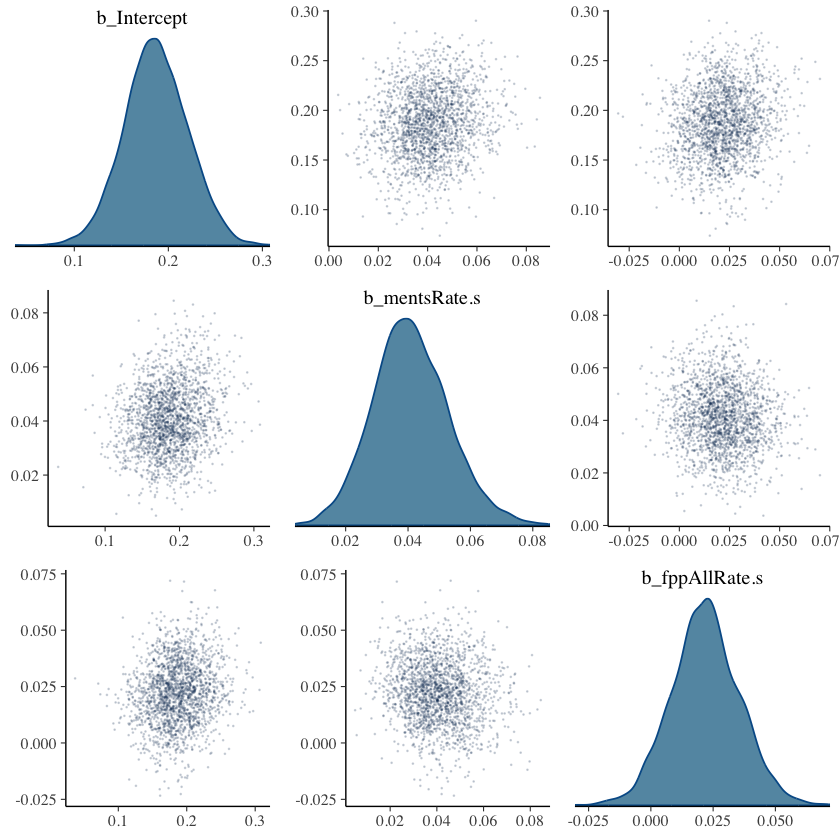

In [29]:
#pairs(f5ppSFIxLClMsSocSelTopIS, variable = "^b_", regex = TRUE)
mcmc_pairs(x = as_draws_df(f5ppSFIxLClMsSocSelTopIS),
           pars = vars(c("b_Intercept","b_mentsRate.s","b_fppAllRate.s")),
           off_diag_args = list(size = 1/10, alpha = 1/6),
           diag_fun = "dens")

In [32]:
#pairs(f5ppSFIxLClMsSocSelTopIS, variable = "^b_", regex = TRUE)
pdf("20250427_PhD_TopicPairs.pdf", width = 10, height = 10)


mcmc_pairs(x = as_draws_df(f5ppSFIxLClMsSocSelTopIS),
           pars = vars("b_Weather1":"b_Government1"),
           off_diag_args = list(size = 1/10, alpha = 1/6),
           diag_fun = "dens")

dev.off()

pdf 
  2

None of the topics or social variables are strongly autocorrelated.

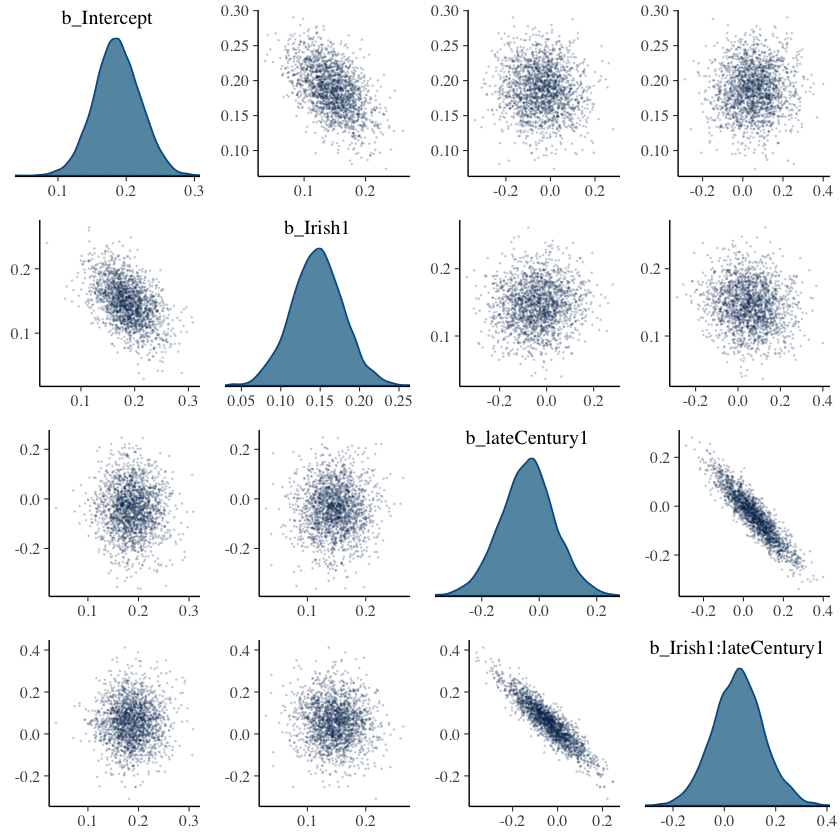

In [37]:
#pairs(f5ppSFIxLClMsSocSelTopIS, variable = "^b_", regex = TRUE)
mcmc_pairs(x = as_draws_df(f5ppSFIxLClMsSocSelTopIS),
           pars = vars(c("b_Intercept", "b_Irish1", "b_lateCentury1", "b_Irish1:lateCentury1")),
           off_diag_args = list(size = 1/10, alpha = 1/6),
           diag_fun = "dens")

## Fixed Effects

In [123]:
# Fixed Effects

myorder <- c("Intercept", 
                     "Gender: Female", 
                     "Origin: Irish", 
                     "Year: After 1869",
                     "Irish + After 1869", 
                     "Place: Canada", 
                     "Month: Jan, Feb, Jul, Aug",
                     "Social Referencing Rate",
                     "Self Referencing Rate",
                     "Topic: Weather",
                     "Topic: Money",
                     "Topic: Farming",
                     "Topic: People",
                     "Topic: Setting",
                     "Topic: Contemplation",
                     "Topic: Family",
                     "Topic: Travel",
                     "Topic: Difficulty",
                     "Topic: Government")

fe90 <- fixef(f5ppSFIxLClMsSocSelTopIS, probs = c(.05,.95))
fe70 <- fixef(f5ppSFIxLClMsSocSelTopIS, probs = c(.15,.85))

temp <- data.frame(round(fe90, digits=4))
table<-cbind(temp, round(fe70[,3:4], digits = 4)) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85)%>%
mutate(Parameter = c("Intercept", 
                     "Gender: Female", 
                     "Origin: Irish", 
                     "Year: After 1869", 
                     "Place: Canada", 
                     "Month: Jan, Feb, Jul, Aug",
                     "Social Referencing Rate",
                     "Self Referencing Rate",
                     "Topic: Weather",
                     "Topic: Money",
                     "Topic: Farming",
                     "Topic: People",
                     "Topic: Setting",
                     "Topic: Contemplation",
                     "Topic: Family",
                     "Topic: Travel",
                     "Topic: Difficulty",
                     "Topic: Government",
                     "Irish + After 1869")) %>%
remove_rownames() %>%
column_to_rownames("Parameter")%>%
mutate(across(1:6, round, 3))
table

,Estimate,Est.Error,Lower90,Upper90,Lower70,Upper70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Intercept,0.187,0.034,0.132,0.243,0.152,0.222
Gender: Female,-0.090,0.032,-0.143,-0.039,-0.123,-0.058
Origin: Irish,0.146,0.033,0.091,0.199,0.113,0.180
Year: After 1869,-0.040,0.095,-0.197,0.117,-0.138,0.056
Place: Canada,-0.019,0.029,-0.066,0.028,-0.048,0.010
"Month: Jan, Feb, Jul, Aug",-0.043,0.024,-0.083,-0.004,-0.069,-0.018
Social Referencing Rate,0.041,0.012,0.022,0.062,0.029,0.053
Self Referencing Rate,0.022,0.014,-0.001,0.044,0.008,0.036
Topic: Weather,-0.036,0.039,-0.100,0.028,-0.075,0.004


In [119]:
print("Estimates: Female")
round(table[1,1] + table[2,1], digits = 3)
round(table[1,1] + table[2,3], digits = 3)
round(table[1,1] + table[2,4], digits = 3)
round(table[1,1] + table[2,5], digits = 3)
round(table[1,1] + table[2,6], digits = 3)
print("Estimates: Low Months")
round(table[1,1] + table[6,1], digits = 3)
round(table[1,1] + table[6,3], digits = 3)
round(table[1,1] + table[6,4], digits = 3)
round(table[1,1] + table[6,5], digits = 3)
round(table[1,1] + table[6,6], digits = 3)

[1] "Estimates: Female"


[1] 0.097

[1] 0.044

[1] 0.148

[1] 0.064

[1] 0.129

[1] "Estimates: Low Months"


[1] 0.144

[1] 0.104

[1] 0.183

[1] 0.118

[1] 0.169

In [105]:
#conditional_effects(f5ppSFIxLClMsSocSelTopIS, prob = .70)

Saving 7 x 7 in image


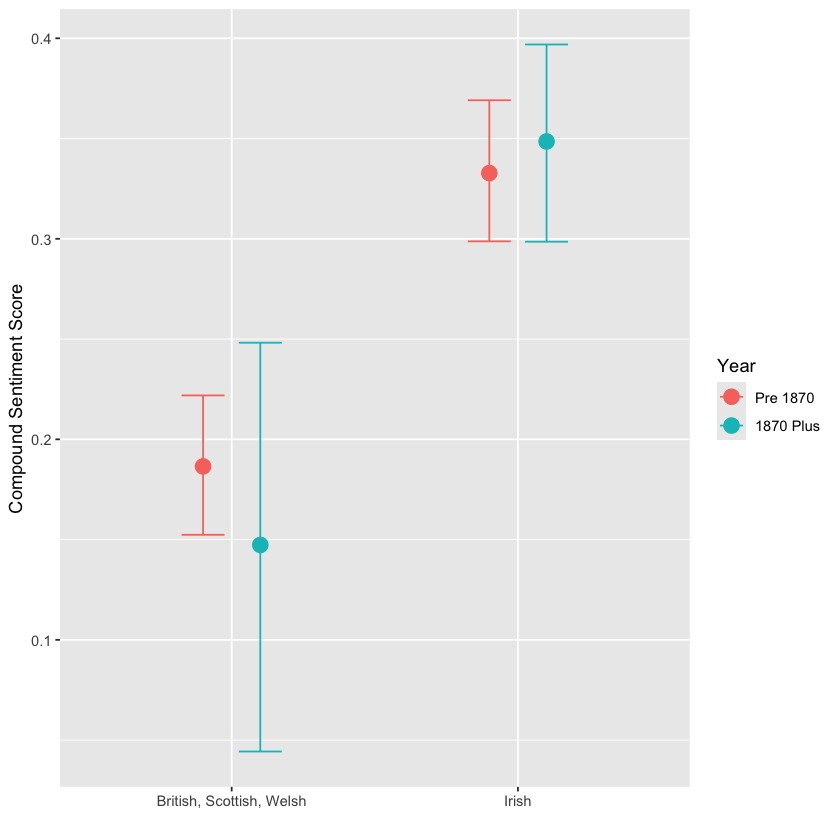

In [106]:
c_eff <- conditional_effects(f5ppSFIxLClMsSocSelTopIS, prob = .70)
ugly_plot <- plot(c_eff, plot = FALSE)[[18]]
ugly_plot +
xlab("") +
ylab("Compound Sentiment Score")+
scale_color_discrete(name = "Year",
                       limits = c("0","1"),
                       labels = c("Pre 1870", "1870 Plus")) +
scale_fill_discrete(name = "Year",
                       limits = c("0","1"),
                       labels = c("Pre 1870", "1870 Plus"))+
scale_x_discrete(labels=c("0" = "British, Scottish, Welsh", "1" = "Irish"))

ggsave("20250427_PhD_Interaction.jpg")

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Saving 7 x 7 in image


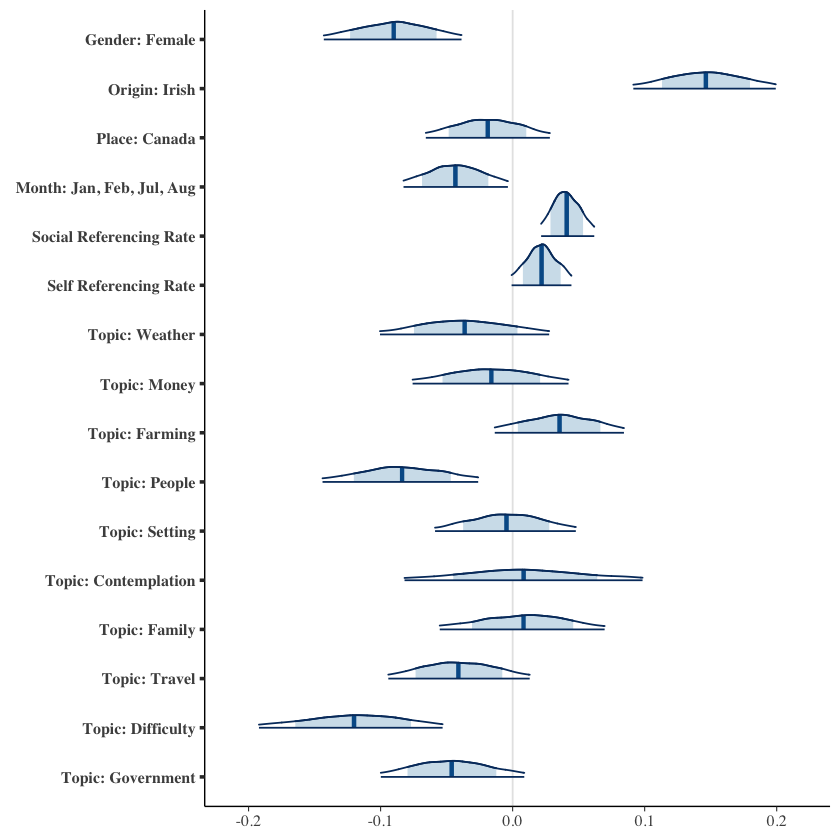

In [42]:
#mcmc_plot(f3_valTopSWB_mis, variable = "^b_", regex = TRUE, prob = 0.7, prob_outer = 0.9, outer_size = 0.5)

p <- mcmc_areas(f5ppSFIxLClMsSocSelTopIS, pars = c("b_Government1",
                                                    "b_Difficulty1",
                                                    "b_Travel1",
                                                    "b_Family1",
                                                    "b_Contemplation1",
                                                    "b_Setting1",
                                                    "b_People1",
                                                    "b_Farming1",
                                                    "b_Money1",
                                                    "b_Weather1", 
                                                    "b_fppAllRate.s",
                                                    "b_mentsRate.s",
                                                    "b_lowMonths1",
                                                    "b_Canada1",
                                                    "b_Irish1",
                                                    "b_Female1"), 
                prob = 0.7, prob_outer = 0.9, point_est = "mean")

p +
scale_y_discrete(labels=c("b_Female1" = "Gender: Female", 
                     "b_Irish1" = "Origin: Irish", 
                     "b_Canada1" = "Place: Canada", 
                     "b_lowMonths1" = "Month: Jan, Feb, Jul, Aug",
                     "b_mentsRate.s" = "Social Referencing Rate",
                     "b_fppAllRate.s" = "Self Referencing Rate",
                     "b_Weather1" = "Topic: Weather",
                     "b_Money1" = "Topic: Money",
                     "b_Farming1" = "Topic: Farming",
                     "b_People1" = "Topic: People",
                     "b_Setting1" = "Topic: Setting",
                     "b_Contemplation1" = "Topic: Contemplation",
                     "b_Family1" = "Topic: Family",
                     "b_Travel1" = "Topic: Travel",
                     "b_Difficulty1" = "Topic: Difficulty",
                     "b_Government1" = "Topic: Government"))

ggsave("20250427_PhD_fixedCCs.jpg")

In [107]:
fe<-fixef(f5ppSFIxLClMsSocSelTopIS, probs = c(.05, .95))
fe

,Estimate,Est.Error,Q5,Q95
Intercept,0.186896341,0.03390505,0.131709425,0.243168535
Female1,-0.090085014,0.03173109,-0.143020435,-0.038715093
Irish1,0.146317546,0.03278931,0.091409494,0.199287856
lateCentury1,-0.039990115,0.09481931,-0.196823407,0.117335464
Canada1,-0.018863342,0.02862548,-0.065755083,0.028192320
lowMonths1,-0.043346700,0.02413532,-0.082645540,-0.003588957
mentsRate.s,0.040925505,0.01218620,0.021574796,0.061816529
fppAllRate.s,0.021912234,0.01375077,-0.000787807,0.044527883
Weather1,-0.036339223,0.03872843,-0.100475316,0.027665214
Money1,-0.016112698,0.03607993,-0.075768593,0.042323179


In [115]:
# Now the Interaction
round(fixef(f5ppSFIxLClMsSocSelTopIS, probs = c(.05,.95))[4, 1] + fixef(f5ppSFIxLClMsSocSelTopIS, probs = c(.05,.95))[19, 1] * 0, 3) # Not Irish, after 1869
round(fixef(f5ppSFIxLClMsSocSelTopIS, probs = c(.05,.95))[4, 1] + fixef(f5ppSFIxLClMsSocSelTopIS, probs = c(.05,.95))[19, 1] * 1, 3) # Irish, after 1869

[1] -0.04

[1] 0.015

In [120]:
post <- as_draws_df(f5ppSFIxLClMsSocSelTopIS) %>% data.frame()

post %>%
  transmute(Irish    = b_lateCentury1 + b_Irish1.lateCentury1 * 1,
            OtherUK = b_lateCentury1 + b_Irish1.lateCentury1 * 0) %>%
  gather(key, value) %>%
  group_by(key) %>%
  summarise(mean = mean(value))
       

key,mean
<chr>,<dbl>
Irish,0.01469668
OtherUK,-0.03999011


Picking joint bandwidth of 0.0114



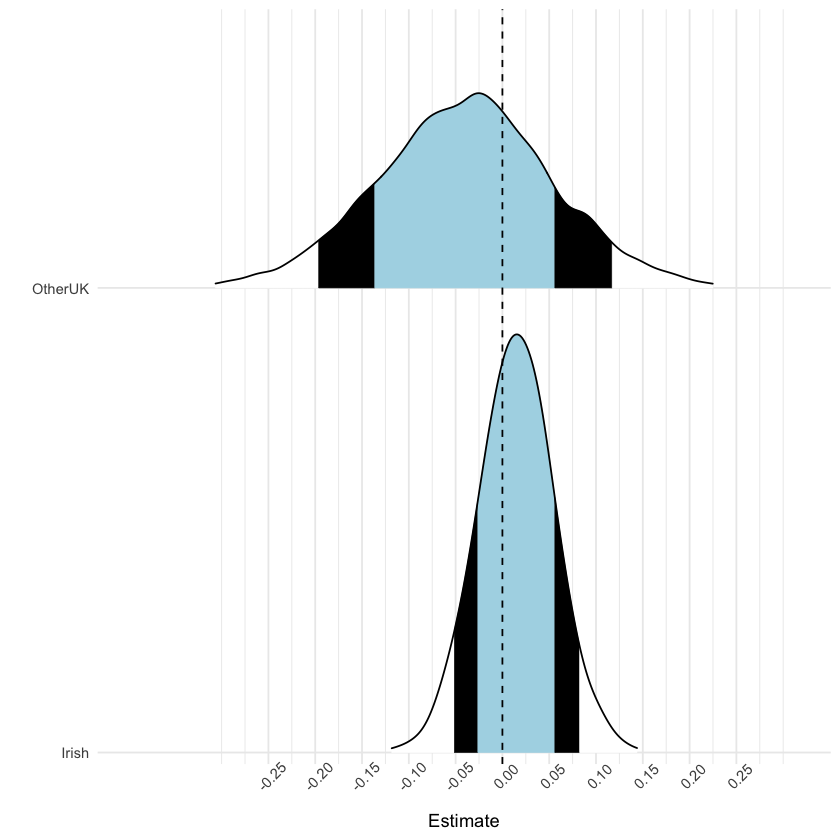

In [122]:
post %>%
  transmute(Irish    = b_lateCentury1 + b_Irish1.lateCentury1 * 1,
            OtherUK = b_lateCentury1 + b_Irish1.lateCentury1 * 0) %>%
  gather(key, value) %>%

# Highlight the tails of the distributions
ggplot(aes(x = value, y = key, fill = factor(stat(quantile)))) +
  stat_density_ridges(
    geom = "density_ridges_gradient",
    calc_ecdf = TRUE,
    quantiles = c(0.05,0.15,0.50,0.85,0.95), alpha = 0.5, scale = .9, rel_min_height = 0.01
  ) +
  scale_fill_manual(
    name = "Credible Intervals", values = c("#FFFFFF", "#000000", "lightblue", "lightblue", "#000000", "#FFFFFF"),
    labels = c("(0, 0.05]", "(0.05, 0.15]", "(0.15, 0.50]", "(0.50, 0.85]", "(0.85, 0.95]", "(0.95, 1]")
  )+ 
ylab("")+
xlab("Estimate")+
theme_minimal()+
theme(legend.position = "none", axis.text.x = element_text(angle=45))+
scale_x_continuous(breaks = seq(-0.25, 0.25, by = .05))+
scale_y_discrete(expand = expansion(add = c(0.025, 0.6)))+
geom_vline(xintercept = 0, linetype=2)

#ggsave("20250407_PhD_YeaSenOriInt-CC.jpg")

Picking joint bandwidth of 0.00702



,Estimate,Est.Error,Q5,Q95
,<dbl>,<dbl>,<dbl>,<dbl>
Farming,0.22,0.03,0.17,0.27
Contemplation,0.20,0.06,0.10,0.30
Family,0.20,0.05,0.12,0.27
Correspondence,0.19,0.03,0.13,0.24
Setting,0.18,0.04,0.12,0.25
Money,0.17,0.04,0.11,0.24
Weather,0.15,0.05,0.08,0.23
Travel,0.15,0.04,0.08,0.21
Government,0.14,0.03,0.09,0.20


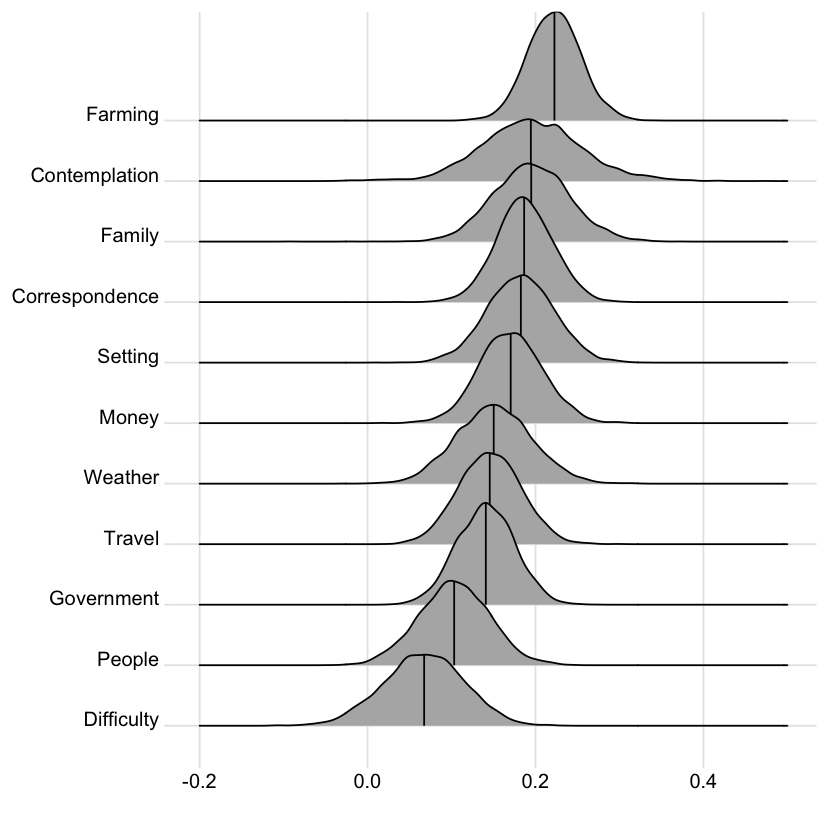

In [124]:
# Simulate dataset for FIXED effects (no docauthorid needed)
nd <- data.frame(Weather=c(0,1,0,0,0,0,0,0,0,0,0),
                Money=c(0,0,1,0,0,0,0,0,0,0,0),
                Farming=c(0,0,0,1,0,0,0,0,0,0,0),
                People=c(0,0,0,0,1,0,0,0,0,0,0),
                Setting=c(0,0,0,0,0,1,0,0,0,0,0),
                Contemplation=c(0,0,0,0,0,0,1,0,0,0,0),
                Family=c(0,0,0,0,0,0,0,1,0,0,0),
                Travel=c(0,0,0,0,0,0,0,0,1,0,0),
                Difficulty=c(0,0,0,0,0,0,0,0,0,1,0),
                Government=c(0,0,0,0,0,0,0,0,0,0,1),
                Canada=c(0,0,0,0,0,0,0,0,0,0,0),
                lowMonths=c(0,0,0,0,0,0,0,0,0,0,0),
                lateCentury=c(0,0,0,0,0,0,0,0,0,0,0),
                mentsRate.s=c(0,0,0,0,0,0,0,0,0,0,0),
                fppAllRate.s=c(0,0,0,0,0,0,0,0,0,0,0),
                Female=c(0,0,0,0,0,0,0,0,0,0,0),
                Irish=c(0,0,0,0,0,0,0,0,0,0,0)
                )

# Fit Simulated Data
f <- data.frame(fitted(f5ppSFIxLClMsSocSelTopIS, 
                       re_formula = NA,
         newdata = nd,
         probs = c(.05, .95), 
         summary = F))

#Assign column names
colnames(f) <- c("Correspondence",
                 "Weather",
                 "Money", 
                 "Farming", 
                 "People", 
                 "Setting", 
                 "Contemplation", 
                 "Family",
                 "Travel",
                 "Difficulty",
                 "Government")

# Restructure
fixed <- f %>% gather(variable, value)

# Get the max and min for the x axis limits and labels
#min(fixed$value)
#max(fixed$value)

p1 <- ggplot(fixed, aes(x = value, y = reorder(variable, value))) + # Descending order of mean valence
stat_density_ridges(quantile_lines = TRUE, quantiles = 2, from = -.2, to = .5)+
#geom_density_ridges() +
  theme_ridges() +
  theme(legend.position = "none", axis.title.y= element_blank()) + 
xlab("")+
#scale_x_continuous(breaks=seq(min(fixed$value),max(fixed$value)))+
#theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+ 
ylab("")

p1

# Fit Simulated Data
f <- data.frame(fitted(f5ppSFIxLClMsSocSelTopIS, 
                       re_formula = NA,
         newdata = nd,
         probs = c(.05, .95), 
         summary = T))

row.names(f) <- c("Correspondence",
                 "Weather",
                 "Money", 
                 "Farming", 
                 "People", 
                 "Setting", 
                 "Contemplation", 
                 "Family",
                 "Travel",
                 "Difficulty",
                 "Government")

f <- f %>% arrange(desc(Estimate))
#f<- f[-5,]
round(f, digits=2)

#ggsave("20250130_valTopSWB-fixedMeans.jpg")